In [44]:
# import json file
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
logins_json_file = r"C:\Users\adame\OneDrive\Documents\GitHub\springboard_repository\springboard_projects\ultimate_challenge_3_\ultimate_challenge\logins.json"
df = pd.read_json(logins_json_file)

ultimate_data_challenge = r"C:\Users\adame\OneDrive\Documents\GitHub\springboard_repository\springboard_projects\ultimate_challenge_3_\ultimate_challenge\ultimate_data_challenge.json"
ultimate_df = pd.read_json(ultimate_data_challenge)

In [3]:
print(type(df), type(ultimate_df))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [4]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
# Aggregate login counts based on 15-minute intervals, groups the data into 15 minute intervals, size counts the number of logins in each intervals
login_counts = df.resample('15min', on='login_time').size().reset_index(name='login_count')

In [7]:
login_counts.head()

,login_time,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


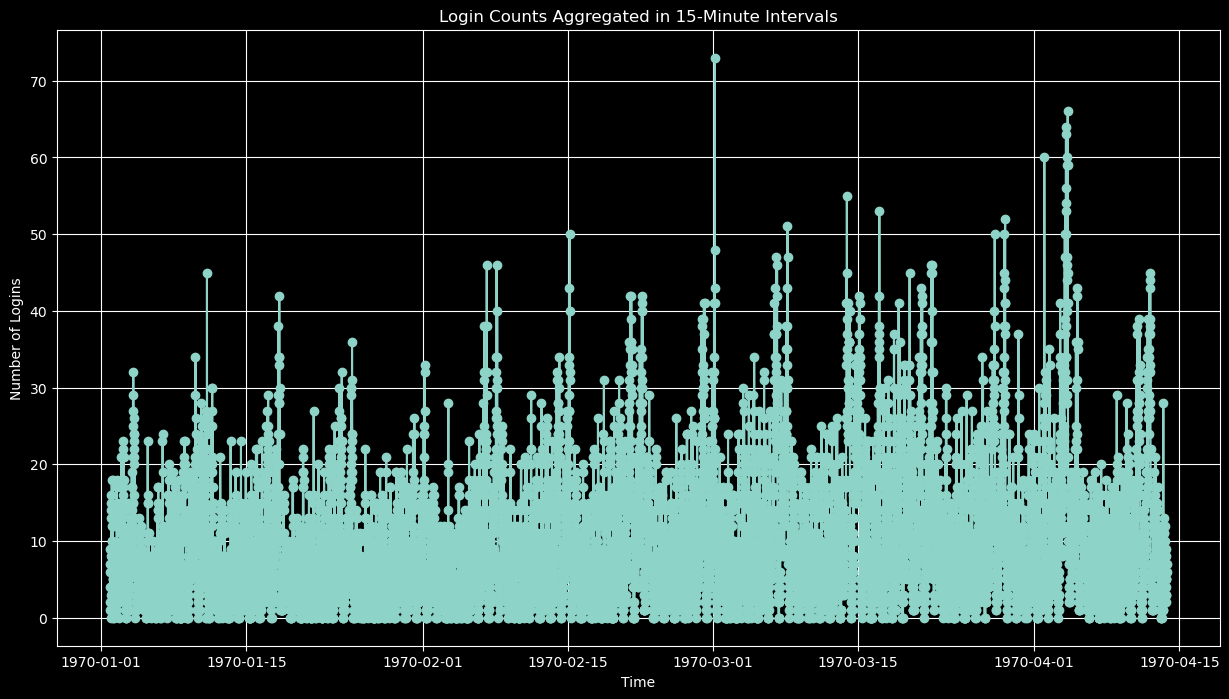

In [8]:
# Plot the time series of login counts
plt.figure(figsize=(15, 8))
plt.plot(login_counts['login_time'], login_counts['login_count'], marker='o')
plt.title('Login Counts Aggregated in 15-Minute Intervals')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()

In [9]:
# create new columns for year, month, and day
login_counts['year'] = login_counts['login_time'].dt.year
login_counts['month'] = login_counts['login_time'].dt.month
login_counts['day'] = login_counts['login_time'].dt.day

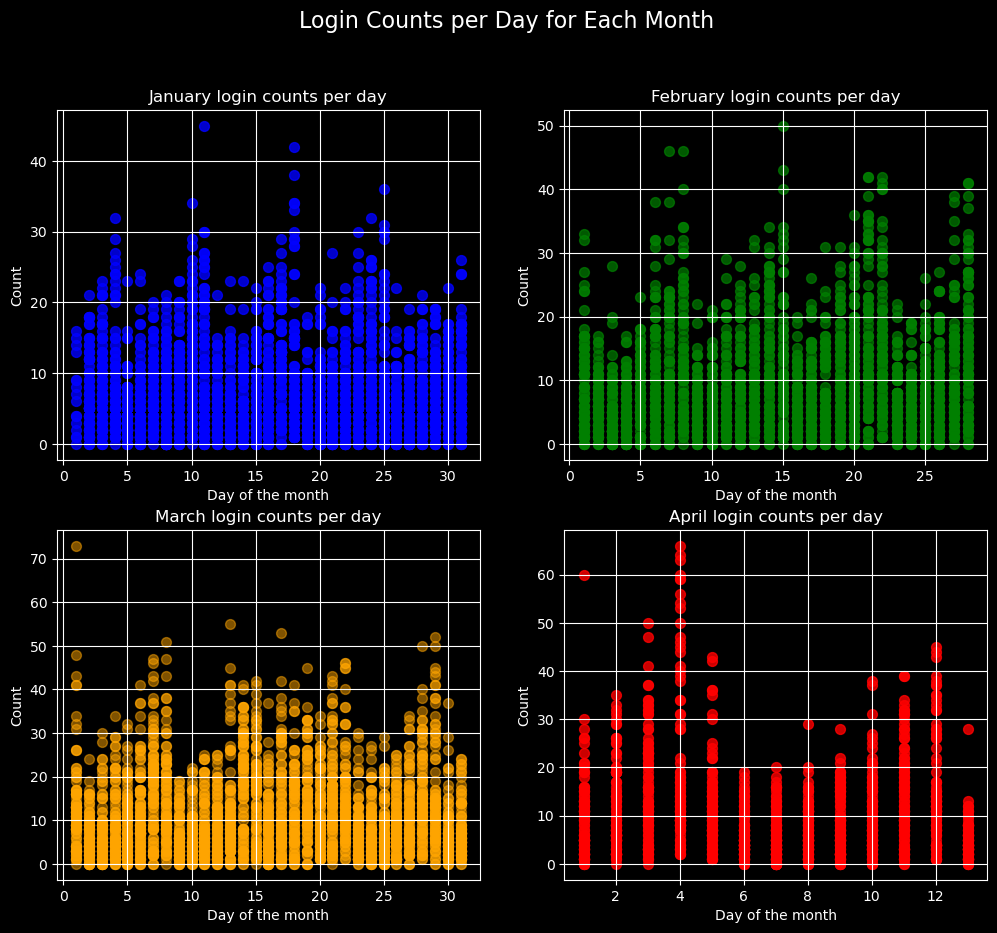

In [10]:
# Create a 2x2 grid of subplots that show the login counts per day for each month
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Login Counts per Day for Each Month', fontsize=16)

# January plot
january_data = login_counts[login_counts['month'] == 1]
axes[0, 0].scatter(x=january_data['day'], 
                   y=january_data['login_count'], 
                   alpha=0.8,
                   color='blue',
                   marker='o',
                   s=50)
axes[0, 0].set_title('January login counts per day')
axes[0, 0].set_xlabel('Day of the month')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(True)

# February plot
february_data = login_counts[login_counts['month'] == 2]
axes[0, 1].scatter(x=february_data['day'], 
                   y=february_data['login_count'], 
                   alpha=0.7,
                   color='green',
                   marker='o',
                   s=50)
axes[0, 1].set_title('February login counts per day')
axes[0, 1].set_xlabel('Day of the month')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(True)

# March plot
march_data = login_counts[login_counts['month'] == 3]
axes[1, 0].scatter(x=march_data['day'], 
                   y=march_data['login_count'], 
                   alpha=0.5,
                   color='orange',
                   marker='o',
                   s=50)
axes[1, 0].set_title('March login counts per day')
axes[1, 0].set_xlabel('Day of the month')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True)

# April plot
april_data = login_counts[login_counts['month'] == 4]
axes[1, 1].scatter(x=april_data['day'], 
                   y=april_data['login_count'], 
                   alpha=0.8,
                   color='red',
                   marker='o',
                   s=50)
axes[1, 1].set_title('April login counts per day')
axes[1, 1].set_xlabel('Day of the month')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(True)

Part 2

The key metric for success would be, did the number of trips by drivers between the cities increase? Perform a random trial between drivers that do not receive a reimbursement and drivers that do receive a reimbursement. The trial should for set period of time, months would work. 

Part 3

In [11]:
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


Data cleaning

In [12]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [13]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [14]:
# change to `signup_date` and `last_trip_date` columns to to datetime
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])

In [15]:
# convert column `ultimate_black_user` from boolean to 1 or 0
ultimate_df['ultimate_black_user'].replace({True:1, False:0}, inplace=True)

4.601559291274655
4.9


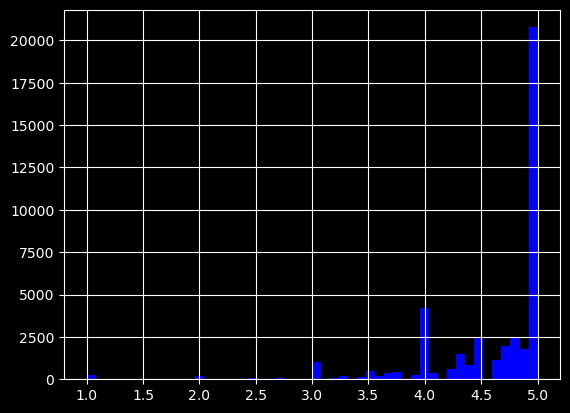

In [16]:
# plot the values the `avg_rating_of_driver` column
ultimate_df['avg_rating_of_driver'].hist(bins=50, color='blue')
print(ultimate_df['avg_rating_of_driver'].mean())
print(ultimate_df['avg_rating_of_driver'].median())

In [17]:
# fill in missing values with the mean value
ultimate_df['avg_rating_of_driver'].fillna(value=ultimate_df['avg_rating_of_driver'].mean(), inplace=True)

In [18]:
# drop missing values from `phone` column
ultimate_df.dropna(subset=['phone'], how='any', inplace=True)

4.777860988543901


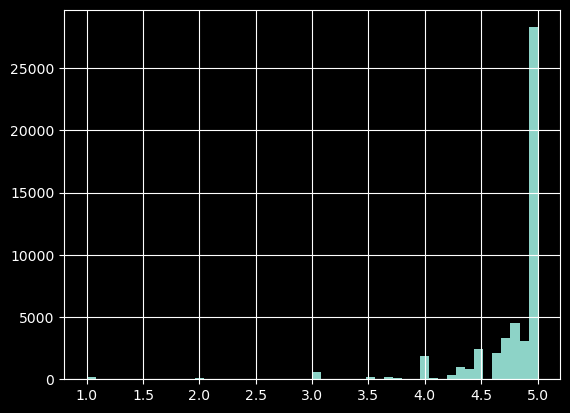

In [19]:
# check values in `avg_rating_by_driver` column
ultimate_df['avg_rating_by_driver'].hist(bins=50)
print(ultimate_df['avg_rating_by_driver'].mean())

In [20]:
# fill missing values with the mean
ultimate_df['avg_rating_by_driver'].fillna(value=ultimate_df['avg_rating_by_driver'].mean(), inplace=True)

Explore the data

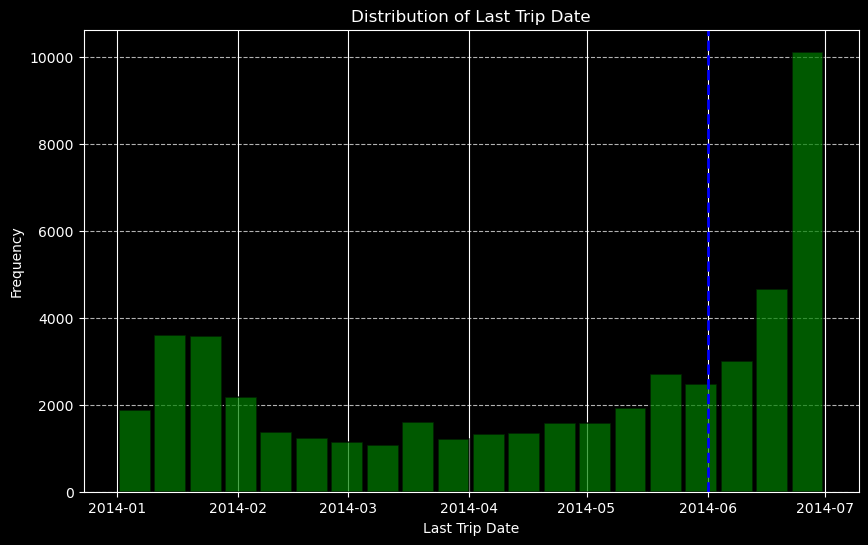

In [21]:
# plot the data in the column `last_trip_date`
ultimate_df['last_trip_date'].hist(bins=20,
                                   color='green', 
                                   figsize=(10, 6),
                                   edgecolor='black',
                                   linewidth=1.2,
                                   alpha=0.7,
                                   zorder=2,
                                   rwidth=0.9)
plt.title('Distribution of Last Trip Date')
plt.xlabel('Last Trip Date')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# add a vertical line to show the cutoff date for the retained users
specific_date = pd.Timestamp('2014-06-01')
plt.axvline(x=specific_date, color='blue', linestyle='--', linewidth=2)
plt.show()

In [22]:
# Define retention as active in the last 30 days from the last date in the dataset

last_date = ultimate_df['last_trip_date'].max()
ultimate_df['retained'] = (ultimate_df['last_trip_date'] >= last_date - datetime.timedelta(days=30)).astype(int)

In [23]:
# add a tenure column to the dataframe
ultimate_df['tenure'] = (last_date - ultimate_df['signup_date']).dt.days

In [24]:
# get the percentage of retained users
percent_retained = ultimate_df['retained'].value_counts(normalize=True) * 100
percent_retained

retained
0    62.35989
1    37.64011
Name: proportion, dtype: float64

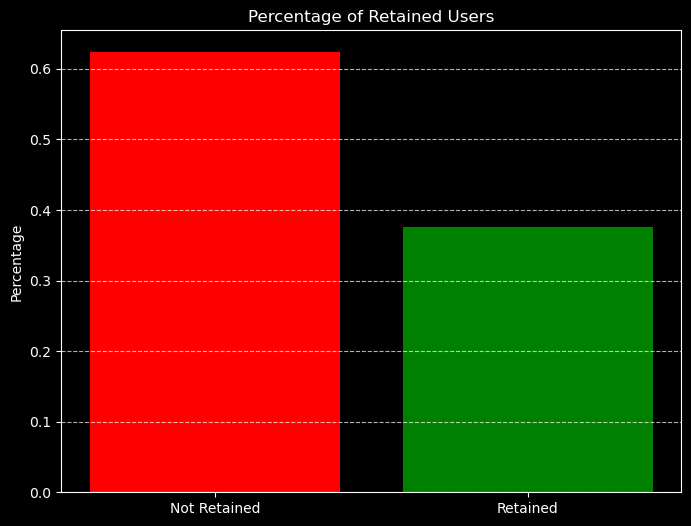

In [25]:
# make a bar plot of the retained users
plt.figure(figsize=(8, 6))
plt.bar(x=['Not Retained', 'Retained'], height=ultimate_df['retained'].value_counts(normalize=True), color=['red', 'green'])
plt.title('Percentage of Retained Users')
plt.ylabel('Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

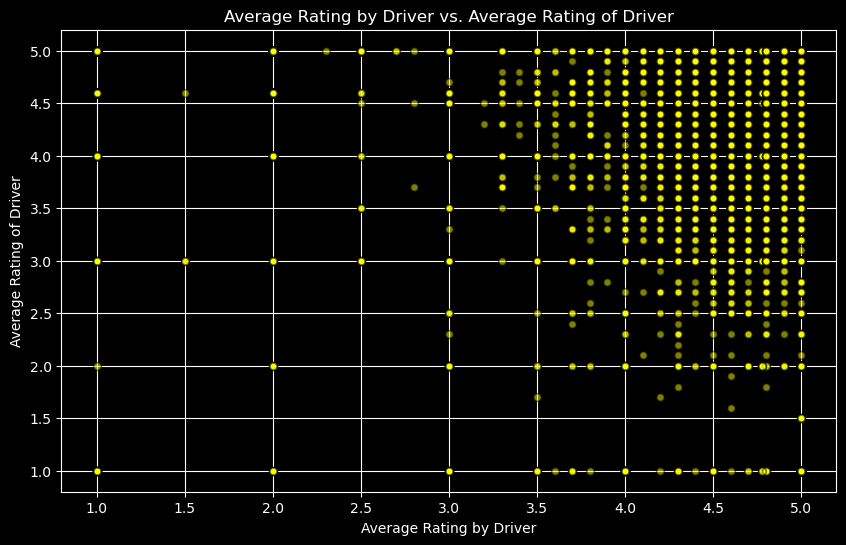

In [26]:
# scatter plot of the `avg_rating_by_driver` and `avg_rating_of_driver` columns
plt.figure(figsize=(10, 6))
plt.scatter(x=ultimate_df['avg_rating_by_driver'], 
            y=ultimate_df['avg_rating_of_driver'], 
            color='yellow', 
            alpha=0.5,
            s=30,
            marker='o',
            edgecolors='black',
            linewidths=1.2,
            zorder=2)
plt.title('Average Rating by Driver vs. Average Rating of Driver')
plt.xlabel('Average Rating by Driver')
plt.ylabel('Average Rating of Driver')
plt.grid(True)
plt.show()

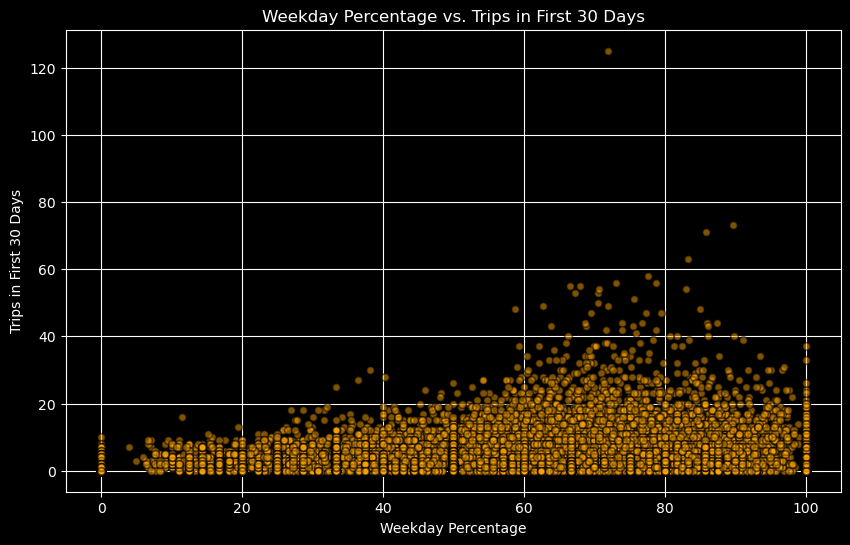

In [27]:
# scatter plot of the `weekday_pct` and `trips_in_first_30_days` columns
plt.figure(figsize=(10, 6))
plt.scatter(x=ultimate_df['weekday_pct'], 
            y=ultimate_df['trips_in_first_30_days'], 
            color='orange', 
            alpha=0.5,
            s=30,
            marker='o',
            edgecolors='black',
            linewidths=1.2,
            zorder=2)
plt.title('Weekday Percentage vs. Trips in First 30 Days')
plt.xlabel('Weekday Percentage')
plt.ylabel('Trips in First 30 Days')
plt.grid(True)
plt.show()

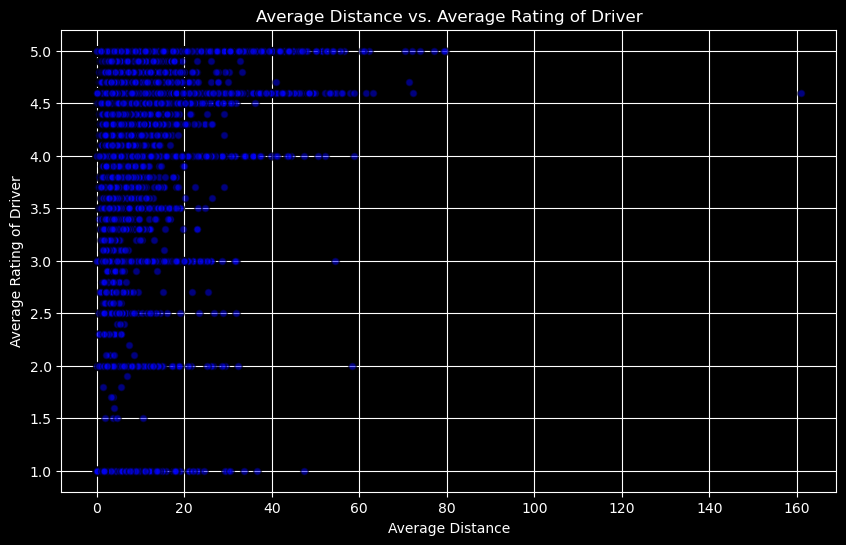

In [28]:
# scatter plot of the `avg_dist` and `avg_rating_of_driver` columns
plt.figure(figsize=(10, 6))
plt.scatter(x=ultimate_df['avg_dist'], 
            y=ultimate_df['avg_rating_of_driver'], 
            color='blue', 
            alpha=0.5,
            s=30,
            marker='o',
            edgecolors='black',
            linewidths=1.2,
            zorder=2)
plt.title('Average Distance vs. Average Rating of Driver')
plt.xlabel('Average Distance')
plt.ylabel('Average Rating of Driver')  
plt.grid(True)
plt.show()

Preprocessing and model building

In [29]:
# encode the `city` column, and drop the original column
ultimate_df = pd.get_dummies(ultimate_df, columns=['city'], drop_first=True, dtype=int)

# encode the `phone` column, and drop the original column
ultimate_df = pd.get_dummies(ultimate_df, columns=['phone'], drop_first=True, dtype=int)

In [30]:
# # split the data into features and target
X = ultimate_df.drop(columns=['signup_date', 'last_trip_date', 'retained'])
y = ultimate_df['retained']


In [31]:
# scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34722, 12) (14882, 12) (34722,) (14882,)


In [36]:
# instantiate the logistic regression model
log_reg = LogisticRegression(max_iter=500, random_state=42, n_jobs=-1)

In [37]:
# fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=42)

In [38]:
# make predictions on the test data
y_pred = log_reg.predict(X_test)

In [40]:
# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7145544953635264


In [46]:
# calculate the precision of the model
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

Precision: 0.6550991501416431


In [47]:
# calculate the recall of the model
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Recall: 0.4989212513484358


In [48]:
# calculate the F1 score of the model
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

F1 Score: 0.5664421310471524


In [49]:
# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', conf_matrix)

Confusion Matrix: [[7859 1461]
 [2787 2775]]


In [50]:
# calculate the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:', class_report)

Classification Report:               precision    recall  f1-score   support

           0       0.74      0.84      0.79      9320
           1       0.66      0.50      0.57      5562

    accuracy                           0.71     14882
   macro avg       0.70      0.67      0.68     14882
weighted avg       0.71      0.71      0.70     14882



In [51]:
# calculate the ROC curve
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 

In [52]:
# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC Score:', auc_score)

AUC Score: 0.7585858708619032


In [55]:
# add predictions to the ultimate_df
ultimate_df['predictions'] = log_reg.predict(X)

In [56]:
ultimate_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,tenure,city_King's Landing,city_Winterfell,phone_iPhone,predictions
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,157,1,0,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,153,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,176,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,172,1,0,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,155,0,1,0,0
